In [ ]:
%matplotlib inline
import os 
import numpy as np
import nibabel as nb 
from numpy import mean, std
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
#from nilearn.plotting import plot_anat
plt.rcParams['font.family'] = 'Myriad Pro'
sns.set_style('white')
from scipy import ndimage

datadir = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSM/NUCLEI_OCT26'
datadir2 = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSM/MRS'
savefigdir    = '/Users/kanaan/Google Drive/TS-EUROTRAIN/Papers/2016_QSM_paper/Figures_python'

palette = sns.color_palette("hls", 6)
sns.palplot(palette)



alpha = 0.7

In [ ]:
def plot_nucleus(subject, nucleus,Zcut, cmap, alpha, segmentation, view = 'axial'):
    
    subject_dir = os.path.join(datadir, subject)
    qsm = np.rot90(nb.load(os.path.join(subject_dir, 'QSM_norm.nii.gz')).get_data()) * - 100
    uni = np.rot90(nb.load(os.path.join(subject_dir, 'MP2RAGE2FLASH_BRAIN.nii.gz')).get_data())/  350
    #uni = np.rot90(nb.load(os.path.join(subject_dir, 'T1MAPS2FLASH.nii.gz')).get_data())/  350

    if segmentation == 'ATAK':
        left  = nb.load(os.path.join(subject_dir,'L_%s.nii.gz')%nucleus).get_data()
        data = np.rot90(left)
        right = nb.load(os.path.join(subject_dir,'R_%s.nii.gz')%nucleus).get_data()
        data = np.rot90(left + right)
        
    elif segmentation == 'FIRST':
        left  = nb.load(os.path.join(subject_dir,'FIRST_HYBRID-L_%s_first_thr.nii.gz')%nucleus).get_data()
        data = np.rot90(left)
        right = nb.load(os.path.join(subject_dir,'FIRST_HYBRID-R_%s_first_thr.nii.gz')%nucleus).get_data()
        data = np.rot90(left + right)
    elif segmentation == 'Full':
        data  = nb.load(os.path.join(subject_dir,'%s.nii.gz')%nucleus).get_data()
        data = np.rot90(data)
        
    data[data==0] = np.nan
    
    fig = plt.figure()
    fig.set_size_inches(10,8)
    ax = plt.axes(frameon=False)
    
    if view == 'axial':
        plt.imshow(qsm[:,:,Zcut], interpolation= None, alpha = 1)#,vmin = -.5, vmax = 0.5)
        plt.imshow(uni[:,:,Zcut], interpolation= None, alpha = 0.35)#,vmin = -.5, vmax = 0.5)
        plt.imshow(data[:,:,Zcut], interpolation= None,cmap=cmap, alpha = alpha)
        if nucleus =='DN':
            plt.xlim(35, 170)
            plt.ylim(230,10)
        else:
            plt.xlim(35, 170)
            plt.ylim(200,50)
    elif view == 'coro':
        plt.imshow(np.rot90(qsm[Zcut,:,:]), interpolation= None, alpha = 1)#,vmin = -.5, vmax = 0.5)
        plt.imshow(np.rot90(uni[Zcut,:,:]), interpolation= None, alpha = 0.35)#,vmin = -.5, vmax = 0.5)
        plt.imshow(np.rot90(data[Zcut,:,:]), interpolation= None,cmap=cmap, alpha = alpha)
        plt.xlim(45, 160)
        plt.ylim(147,17)

    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    
    #plt.savefig(os.path.join(savefigdir, 'brain_nucleus_%s.png'%nucleus),dpi = 100, bbox_inches='tight')



In [ ]:
sub = 'BATP'
palette = sns.color_palette("hls", 6)
pal = colors.ListedColormap([palette[0]])
plot_nucleus(sub, 'SN', '129', pal , alpha= alpha, segmentation = 'ATAK', view = 'coro')


In [ ]:
sub = 'BATP'
pal = colors.ListedColormap([palette[1]])
plot_nucleus(sub, 'STN', '129', pal , alpha= alpha, segmentation = 'ATAK', view = 'coro')


In [ ]:
sub = 'BATP'
pal = colors.ListedColormap([palette[2]])
plot_nucleus(sub, 'RN', '140', pal , alpha= alpha, segmentation = 'ATAK', view = 'coro')


In [ ]:
sub = 'BATP'
pal = colors.ListedColormap([palette[3]])
plot_nucleus(sub, 'GPi', '60', pal , alpha= alpha, segmentation = 'ATAK', view = 'axial')


/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


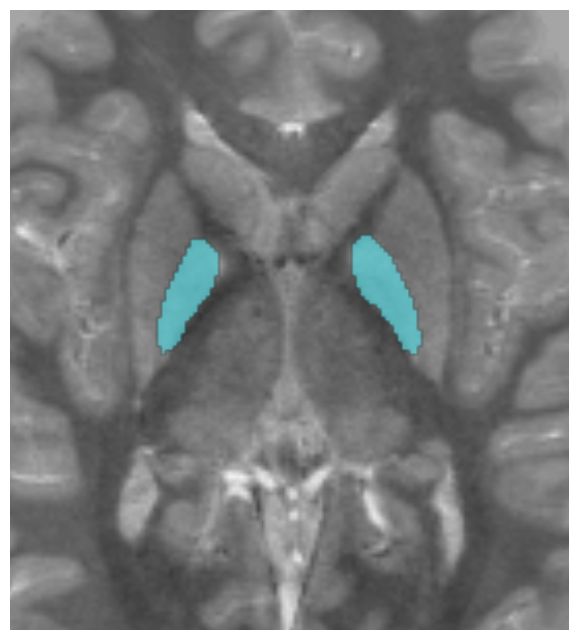

In [23]:
sub = 'BATP'
pal = colors.ListedColormap([palette[3]])
plot_nucleus(sub, 'Pall', '64', pal , alpha= alpha, segmentation = 'FIRST', view = 'axial')


/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


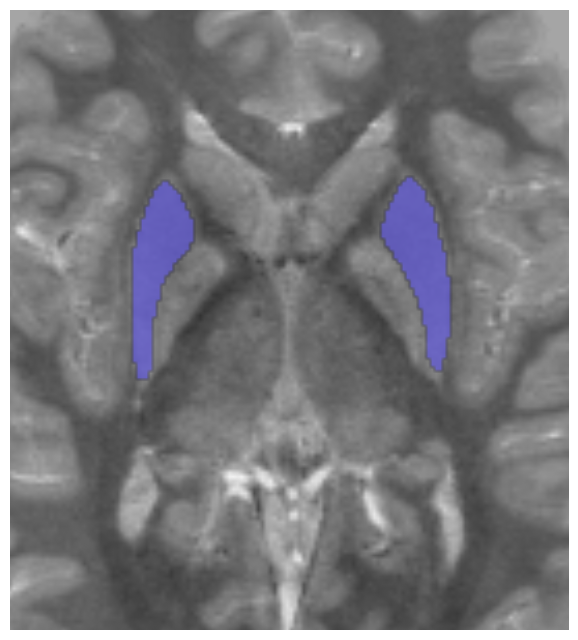

In [24]:
sub = 'BATP'
pal = colors.ListedColormap([palette[4]])
plot_nucleus(sub, 'Puta', '64', pal , alpha= alpha, segmentation = 'FIRST', view = 'axial')

/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


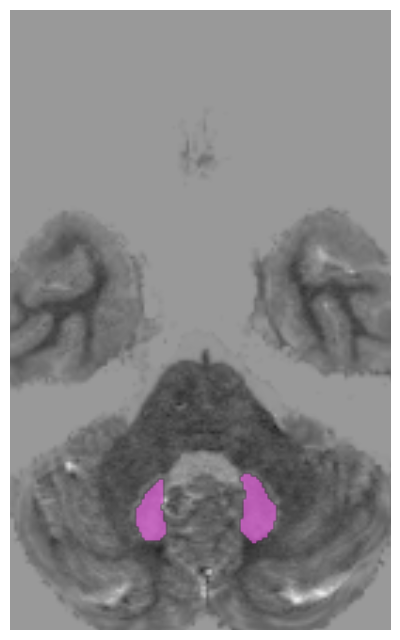

In [25]:
sub = 'BATP'
pal = colors.ListedColormap([palette[5]])
plot_nucleus(sub, 'DN', '20', pal , alpha= alpha, segmentation = 'ATAK', view = 'axial')

In [26]:

def edge_detect_first(i):
    ero =  ndimage.binary_erosion(i, iterations=2).astype(i.dtype)
    dil =  ndimage.binary_dilation(i, iterations=1).astype(i.dtype)
    sep = dil-ero
    sep = ndimage.binary_erosion(sep, iterations=1).astype(sep.dtype)
    sep[sep==0]=np.nan
    return sep

In [27]:
def plot_nucleus2(subject, nucleus,Zcut, cmap, alpha, segmentation, view = 'axial'):
    
    subject_dir = os.path.join(datadir, subject)
    qsmx = np.rot90(nb.load(os.path.join(subject_dir, 'QSM_norm.nii.gz')).get_data()) 
    lv = np.rot90(nb.load(os.path.join(subject_dir, 'FLASH_LV_constricted.nii.gz')).get_data())
    qsm = qsmx + lv
    
    uni = np.rot90(nb.load(os.path.join(subject_dir, 'MP2RAGE2FLASH_BRAIN.nii.gz')).get_data()) /  350
    #uni = np.rot90(nb.load(os.path.join(subject_dir, 'T1MAPS2FLASH.nii.gz')).get_data())/  350
    
    if segmentation == 'ATAK':
        left  = nb.load(os.path.join(subject_dir,'L_%s.nii.gz')%nucleus).get_data()
        data = np.rot90(left)
        #right = nb.load(os.path.join(subject_dir,'R_%s.nii.gz')%nucleus).get_data()
        #data = np.rot90(left + right)
        
    elif segmentation == 'FIRST':
        data  = np.rot90(nb.load(os.path.join(subject_dir,'FIRST_HYBRID-L_%s_first_thr.nii.gz')%nucleus).get_data())
    elif segmentation == 'Full':
        data  = np.rot90(nb.load(os.path.join(subject_dir,'%s.nii.gz')%nucleus).get_data())
        
    data_edge = edge_detect_first(data)
    data[data==0] = np.nan
    qsm[qsm== -0.021035] = np.nan
    qsm = qsm * -1
    fig = plt.figure()
    fig.set_size_inches(10,8)
    ax = plt.axes(frameon=False)
    
    if view == 'axial':
        plt.imshow(qsm[:,:,Zcut], interpolation= None, alpha = 1,vmin = -.3, vmax = .35)
        plt.imshow(uni[:,:,Zcut], interpolation= None, alpha = 0.4)#,vmin = -.5, vmax = 0.5)
        plt.imshow(data[:,:,Zcut], interpolation= None,cmap=cmap, alpha = alpha)
        plt.imshow(data_edge[:,:,Zcut], interpolation= None,cmap=cmap, alpha = 1)

        #plt.xlim(35, 170)
        #plt.ylim(200,50)
    elif view == 'coro':
        plt.imshow(np.rot90(qsm[Zcut,:,:]), interpolation= None, alpha = 1, vmin = -.5, vmax = 1)
        plt.imshow(np.rot90(uni[Zcut,:,:]), interpolation= None, alpha = 0.2)#,vmin = -.5, vmax = 0.5)
        plt.imshow(np.rot90(data[Zcut,:,:]), interpolation= None,cmap=cmap, alpha = alpha)
        #plt.xlim(45, 160)
        #plt.ylim(147,17)

    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    #plt.savefig(os.path.join(savefigdir, 'MASK_%s.png'%nucleus),dpi = 100, bbox_inches='tight', transparent = 1)
    
def plot_qsm_mrs(subject, nucleus,Zcut, cmap, alpha, segmentation, view = 'axial'):
    
    subject_dir = os.path.join(datadir, subject)
    qsmx = np.rot90(nb.load(os.path.join(subject_dir, 'QSM_norm.nii.gz')).get_data()) 
    lv = np.rot90(nb.load(os.path.join(subject_dir, 'FLASH_LV_constricted.nii.gz')).get_data())
    qsm = qsmx + lv
    
    uni = np.rot90(nb.load(os.path.join(subject_dir, 'MP2RAGE2FLASH_BRAIN.nii.gz')).get_data()) /  350
    #uni = np.rot90(nb.load(os.path.join(subject_dir, 'T1MAPS2FLASH.nii.gz')).get_data())/  350
   
    
    data1  = np.rot90(nb.load(os.path.join(subject_dir,'FIRST_HYBRID-L_Puta_first_thr.nii.gz')).get_data())
    data2  = np.rot90(nb.load(os.path.join(subject_dir,'FIRST_HYBRID-L_Caud_first_thr.nii.gz')).get_data())
    #data3  = np.rot90(nb.load(os.path.join(subject_dir,'FIRST_HYBRID-L_Pall_first_thr.nii.gz')).get_data())
    data= data1+data2#+data3
    
    data_edge = edge_detect_first(data)
    data[data==0] = np.nan
    uni[uni==0] = np.nan
    qsm[qsm== -0.021035] = np.nan
    qsm = qsm * -1
    fig = plt.figure()
    fig.set_size_inches(10,8)
    ax = plt.axes(frameon=False)
    
    if view == 'axial':
        plt.imshow(qsm[:,:,Zcut], interpolation= None, alpha = 1,vmin = -.3, vmax = .35)
        plt.imshow(uni[:,:,Zcut], interpolation= None, alpha = 0.4)#,vmin = -.5, vmax = 0.5)
        plt.imshow(data[:,:,Zcut], interpolation= None,cmap=cmap, alpha = alpha)
        plt.imshow(data_edge[:,:,Zcut], interpolation= None,cmap=cmap, alpha = 1)

        #plt.xlim(35, 170)
        #plt.ylim(200,50)
    elif view == 'coro':
        plt.imshow(np.rot90(qsm[Zcut,:,:]), interpolation= None, alpha = 1, vmin = -.5, vmax = 1)
        plt.imshow(np.rot90(uni[Zcut,:,:]), interpolation= None, alpha = 0.2)#,vmin = -.5, vmax = 0.5)
        plt.imshow(np.rot90(data[Zcut,:,:]), interpolation= None,cmap=cmap, alpha = alpha)
        #plt.xlim(45, 160)
        #plt.ylim(147,17)
    
    elif view == 'sagg':
        plt.imshow(np.rot90(qsm[:,Zcut,:]), interpolation= None, alpha = 1, vmin = -.2, vmax = .2)
        #plt.imshow(np.rot90(uni[:,Zcut,:]), interpolation= None, alpha = 0.2)#,vmin = -.5, vmax = 0.5)
        plt.imshow(np.rot90(data[:,Zcut,:]), interpolation= None,cmap=cmap, alpha = alpha)
        #plt.xlim(45, 160)
        #plt.ylim(147,17)    
    
        
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    plt.savefig(os.path.join(savefigdir, 'MASK_QSMMRS.png'),dpi = 100, bbox_inches='tight', transparent = 1)
    
    
    
    
def plot_mrs(subject,Zcut, cmap, alpha):

    subject_dir = os.path.join(datadir2, subject)
    uni = np.fliplr(np.rot90(nb.load(os.path.join(subject_dir, 'MP2RAGE_UNI_PPROC.nii.gz')).get_data())) #*-1
    dn  = np.fliplr(np.rot90(nb.load(os.path.join(subject_dir, 'MP2RAGE_UNI_denoised.nii')).get_data())) #*-1

    uni[uni>0] = 1
    uni = uni*dn
    
    data = np.fliplr(np.rot90(nb.load(os.path.join(subject_dir,'STR_Mask_RPI.nii.gz')).get_data()))
    data[data==0] = np.nan
    fig = plt.figure()
    fig.set_size_inches(10,10)
    ax = plt.axes(frameon=False)
    plt.imshow(uni[:,:,Zcut], interpolation= None, alpha = 1, vmin = 0, vmax = 3500)
    plt.imshow(data[:,:,Zcut], interpolation= None,cmap=cmap, alpha = alpha)
    #plt.xlim(35, 170)
    #plt.ylim(200,50)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    
    #plt.savefig(os.path.join(savefigdir, 'MASK_MRS.png'),dpi = 300, bbox_inches='tight', transparent = 1)
    

In [28]:
sub = 'BATP'
pal = colors.ListedColormap([palette[1]])
pal = colors.ListedColormap(['red','white'])
plot_mrs(sub,163, pal, 0.6)
#pal = colors.ListedColormap([palette[4]])
#plot_nucleus2(sub, 'Puta', '66', pal , alpha= alpha, segmentation = 'FIRST', view = 'axial')

IOError: [Errno 2] No such file or directory: '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSM/MRS/BATP/MP2RAGE_UNI_PPROC.nii.gz'

/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:75: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:76: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:77: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:78: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


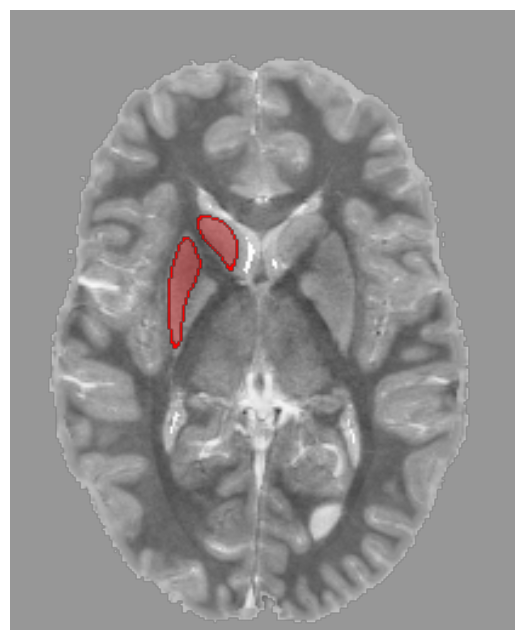

In [29]:
sub = 'BATP'
pal = colors.ListedColormap('red')
plot_qsm_mrs(sub, 'Caud', '67', pal , alpha= 0.3, segmentation = 'FIRST', view = 'axial')

/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:90: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:92: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


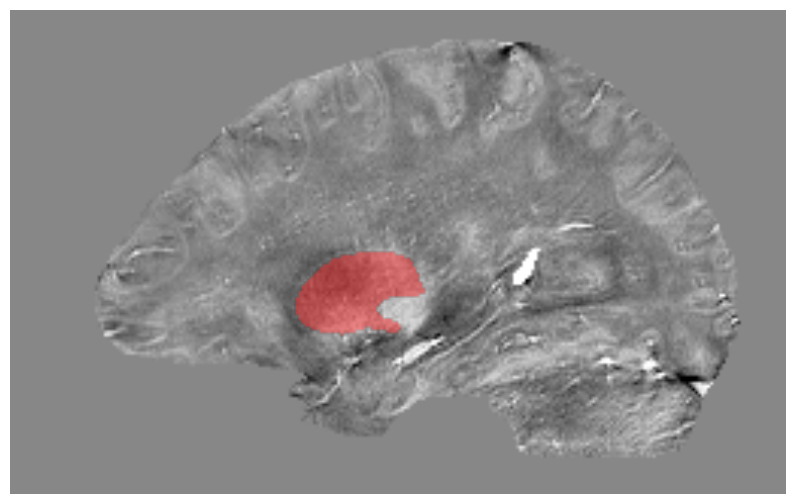

In [30]:
plot_qsm_mrs(sub, 'Caud', '70', pal , alpha= 0.4, segmentation = 'FIRST', view = 'sagg')

In [31]:
def edge_detect_sobel(i):
    i= ndimage.binary_erosion(i, iterations = 1).astype(i.dtype)
    sx = ndimage.sobel(i, 0, mode = mode)
    sy = ndimage.sobel(i, 1, mode = mode)
    sz = ndimage.sobel(i, 2, mode = mode)
    sob = np.hypot(sx, sy,sz)
    sob[sob<5]=np.nan
    #sob *= 255.0 / np.max(sob)
    return sob

def edge_detect_ero(i):
    ero  = ndimage.binary_erosion(i,iterations=1).astype(i.dtype)
    edge = i - ero
    edge[edge==0]=np.nan
    return edge

def edge_detect_first(i):
    ero =  ndimage.binary_erosion(i, iterations=2).astype(i.dtype)
    dil =  ndimage.binary_dilation(i, iterations=1).astype(i.dtype)
    sep = dil-ero
    sep = ndimage.binary_erosion(sep, iterations=1).astype(sep.dtype)
    sep[sep==0]=np.nan
    return sep

In [32]:
def plot_mni(cut):

    qsm = np.rot90(nb.load(os.path.join(datadir[:-4], 'ATAK/mean.nii.gz')).get_data()) 
    vmin = -.15
    vmax = 0.15
    xlim = [15, 165]
    ylim = [200,15]

    fig =plt.figure()
    fig.set_size_inches(20, 20)
    
    alpha = 1
    cmapx = ['b','r',]
    #cmapx = sns.color_palette("hls", 6)    
    ax1 = plt.subplot2grid((1,3), (0,0),  colspan = 1, rowspan =1)
    ax1.imshow(qsm[:,:,cut[0]] , vmin = vmin, vmax = vmax, interpolation='nearest')

    ax2 = plt.subplot2grid((1,3), (0,1),  colspan = 1, rowspan =1)
    ax2.imshow(qsm[:,:,cut[1]], vmin = vmin, vmax = vmax, interpolation='nearest')

    ax3 = plt.subplot2grid((1,3), (0,2),  colspan = 1, rowspan =1)
    ax3.imshow(qsm[:,:,cut[2]], vmin = vmin, vmax = vmax, interpolation='nearest')

    ax1.set_xlim(xlim[0], xlim[1])
    ax1.set_ylim(ylim[0], ylim[1])
    ax2.set_xlim(xlim[0], xlim[1])
    ax2.set_ylim(ylim[0], ylim[1])
    ax3.set_xlim(xlim[0], xlim[1])
    ax3.set_ylim(ylim[0], ylim[1])
    
    ax1.axes.get_yaxis().set_visible(False)
    ax1.axes.get_xaxis().set_visible(False)
    ax2.axes.get_yaxis().set_visible(False)
    ax2.axes.get_xaxis().set_visible(False)
    ax3.axes.get_yaxis().set_visible(False)
    ax3.axes.get_xaxis().set_visible(False)
    
    #ax1.annotate(subject , xy = (20,30), fontsize = 25,  color='r')
    fig.tight_layout()
    plt.savefig(os.path.join(savefigdir, 'plt_qsm_mni.png'),dpi = 300, bbox_inches='tight')

In [33]:
def plot_qsm(subject, cut):
    
    if subject =='mni':
        qsm = np.rot90(nb.load(os.path.join(datadir[:-4], 'ATAK/mean.nii.gz')).get_data()) #* - 100
        rn  = np.rot90(nb.load(os.path.join(datadir[:-4], 'ATAK_remake_oct18/atlas/L_STN_opt2.nii.gz')).get_data())
        sn  = np.rot90(nb.load(os.path.join(datadir[:-4], 'ATAK_remake_oct18/atlas/L_RN_opt2.nii.gz')).get_data()) 
        vmin = -.2
        vmax = 0.2
        xlim = [15, 165]
        ylim = [200,15]
    else:
        qsm = np.rot90(nb.load(os.path.join(datadir, subject, 'QSM_denoised.nii')).get_data()) 
        rn  = np.rot90(nb.load(os.path.join(datadir, subject, 'L_RN.nii.gz')).get_data()) + np.rot90(nb.load(os.path.join(datadir, subject, 'R_RN.nii.gz')).get_data()) 
        dn  = np.rot90(nb.load(os.path.join(datadir, subject, 'L_DN.nii.gz')).get_data()) + np.rot90(nb.load(os.path.join(datadir, subject, 'R_DN.nii.gz')).get_data()) 
        sn  = np.rot90(nb.load(os.path.join(datadir, subject, 'L_SN.nii.gz')).get_data()) + np.rot90(nb.load(os.path.join(datadir, subject, 'R_SN.nii.gz')).get_data()) 
        stn = np.rot90(nb.load(os.path.join(datadir, subject, 'L_STN.nii.gz')).get_data()) + np.rot90(nb.load(os.path.join(datadir, subject, 'R_STN.nii.gz')).get_data()) 
        cau = np.rot90(nb.load(os.path.join(datadir, subject, 'FIRST_HYBRID-L_Caud_first_thr.nii.gz')).get_data()) + np.rot90(nb.load(os.path.join(datadir, subject, 'FIRST_HYBRID-R_Caud_first_thr.nii.gz')).get_data()) 
        put = np.rot90(nb.load(os.path.join(datadir, subject, 'FIRST_HYBRID-L_Puta_first_thr.nii.gz')).get_data()) + np.rot90(nb.load(os.path.join(datadir, subject, 'FIRST_HYBRID-R_Puta_first_thr.nii.gz')).get_data()) 
        pal = np.rot90(nb.load(os.path.join(datadir, subject, 'FIRST_HYBRID-L_Pall_first_thr.nii.gz')).get_data()) + np.rot90(nb.load(os.path.join(datadir, subject, 'FIRST_HYBRID-R_Pall_first_thr.nii.gz')).get_data()) 
        tha = np.rot90(nb.load(os.path.join(datadir, subject, 'FIRST_HYBRID-L_Thal_first_thr.nii.gz')).get_data()) + np.rot90(nb.load(os.path.join(datadir, subject, 'FIRST_HYBRID-R_Thal_first_thr.nii.gz')).get_data()) 
        
        gm  = np.rot90(nb.load(os.path.join(datadir, subject, 'FLASH_GM.nii.gz')).get_data())
        wm  = np.rot90(nb.load(os.path.join(datadir, subject, 'FLASH_WM.nii.gz')).get_data())
        cm  = np.rot90(nb.load(os.path.join(datadir, subject, 'FLASH_CSF.nii.gz')).get_data())

        dn_edge = edge_detect_ero(dn)
        rn_edge = edge_detect_ero(rn)
        sn_edge = edge_detect_ero(sn)
        stn_edge = edge_detect_ero(stn)
        put_edge = edge_detect_first(put)
        pal_edge = edge_detect_first(pal)
        cau_edge = edge_detect_first(cau)
        tha_edge = edge_detect_first(tha)
        for i in [rn,sn,stn,put,pal,cau, tha,dn]:
            i[i==0] = np.nan

        #qsm = mask * qsm
        vmin = -.3
        vmax = 0.3
        xlim = [10, 190]
        ylim = [250,15]
        
    fig =plt.figure()
    fig.set_size_inches(20, 20)
    
    alpha = 1
    cmapx = ['b','r',]
    #cmapx = sns.color_palette("hls", 6)    
    ax1 = plt.subplot2grid((1,3), (0,0),  colspan = 1, rowspan =1)
    ax1.imshow(qsm[:,:,cut[0]] , vmin = vmin, vmax = vmax, interpolation='nearest')
    for i,nuc in enumerate([dn_edge]):
        ax1.imshow(nuc[:,:,cut[0]], cmap = colors.ListedColormap([cmapx[0]]), alpha = alpha)
    for i,nuc in enumerate([dn]):
        ax1.imshow(nuc[:,:,cut[0]], cmap = colors.ListedColormap([cmapx[0]]), alpha = 0.1)
  
    ax2 = plt.subplot2grid((1,3), (0,1),  colspan = 1, rowspan =1)
    ax2.imshow(qsm[:,:,cut[1]], vmin = vmin, vmax = vmax, interpolation='nearest')
    for i,nuc in enumerate([rn_edge,sn_edge,stn_edge]):
        ax2.imshow(nuc[:,:,cut[1]], cmap = colors.ListedColormap([cmapx[0]]), alpha = alpha)
    for i,nuc in enumerate([rn,sn,stn]):
        ax2.imshow(nuc[:,:,cut[1]], cmap = colors.ListedColormap([cmapx[0]]), alpha = 0.1)
  
    ax3 = plt.subplot2grid((1,3), (0,2),  colspan = 1, rowspan =1)
    ax3.imshow(qsm[:,:,cut[2]], vmin = vmin, vmax = vmax, interpolation='nearest')
    for i,nuc in enumerate([put_edge,pal_edge,cau_edge, tha_edge]):
        ax3.imshow(nuc[:,:,cut[2]], cmap = colors.ListedColormap([cmapx[1]]), alpha = alpha)
    for i,nuc in enumerate([put,pal,cau, tha]):
        ax3.imshow(nuc[:,:,cut[2]], cmap = colors.ListedColormap([cmapx[1]]), alpha = 0.15)
  
    ax1.set_xlim(xlim[0], xlim[1])
    ax1.set_ylim(ylim[0], ylim[1])
    ax2.set_xlim(xlim[0], xlim[1])
    ax2.set_ylim(ylim[0], ylim[1])
    ax3.set_xlim(xlim[0], xlim[1])
    ax3.set_ylim(ylim[0], ylim[1])
    
    ax1.axes.get_yaxis().set_visible(False)
    ax1.axes.get_xaxis().set_visible(False)
    ax2.axes.get_yaxis().set_visible(False)
    ax2.axes.get_xaxis().set_visible(False)
    ax3.axes.get_yaxis().set_visible(False)
    ax3.axes.get_xaxis().set_visible(False)
    
    #ax1.annotate(subject , xy = (20,30), fontsize = 25,  color='r')
    fig.tight_layout()
    plt.savefig(os.path.join(savefigdir, 'plt_qsm_%s.png'%subject),dpi = 300, bbox_inches='tight')
    

In [34]:
plot_qsm('BATP', cut = [19,49,64])
plot_mni(cut = [35,60,73])

IOError: [Errno 2] No such file or directory: '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSM/NUCLEI_OCT26/BATP/QSM_denoised.nii'

In [ ]:
plot_qsm('BATP', cut = [19,49,64])

In [ ]:
img1= np.rot90(nb.load('/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSM/NUC/PAHT/FIRST_HYBRID-L_Puta_first_thr.nii.gz').get_data())
#img1[img1==0]=np.nan
img2= np.rot90(nb.load('/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSM/NUC/PAHT/QSM_denoised.nii').get_data())

ero =  ndimage.binary_erosion(img1, iterations=2).astype(img1.dtype)
dil =  ndimage.binary_dilation(img1, iterations=1).astype(img1.dtype)

#ero[ero==0]=np.nan
#img1[img1==0]=np.nan

sep = dil-ero
sep = ndimage.binary_erosion(sep, iterations=1).astype(sep.dtype)
sep[sep==0]=np.nan


cut = 57
plt.imshow(img2[:,:,cut], interpolation='nearest')
#plt.imshow(img1[:,:,cut], interpolation='nearest',cmap = colors.ListedColormap(['blue']))
#plt.imshow(ero[:,:,cut], interpolation='nearest',cmap = colors.ListedColormap(['red']))
plt.imshow(sep[:,:,cut], interpolation='nearest',cmap = colors.ListedColormap(['red']))

plt.xlim(50,130)
plt.ylim(180,80)

In [ ]:
plot_qsm('PAHT', cut = [14,40,57])
#plot_qsm('mni', cut = [50,60,70])

In [ ]:
plot_qsm('PAHT', cut = [14,43,58])


In [ ]:
plot_qsm('BATP', cut = [19,49,64])

In [ ]:
from scipy import ndimage
edge_horizont = ndimage.sobel(greyscale, 0)
edge_vertical = ndimage.sobel(greyscale, 1)
magnitude = np.hypot(edge_horizont, edge_vertical)

In [ ]:
population = [i for i in os.listdir(datadir)]#.remove('')
population.remove('.DS_Store')
population.remove('SDCT')

for i in population:
    plot_qsm(i, 61, 'QSM_denoised.nii')